In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import pytesseract

In [2]:
rgb = cv2.imread('../datas/text_3.png')
rgb = cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB)

In [3]:
def detect(img):
    dst = img.copy()
    # 1.  转化成灰度图
    gray = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)

    # 2. 形态学变换的预处理，得到可以查找矩形的图片
    dilation = preprocess(gray)

    # 3. 查找和筛选文字区域
    regions,boxes = findTextRegion(dilation)

    # 4. 用绿线画出这些找到的轮廓
    for box in boxes:
        cv2.drawContours(dst, [box], 0, (0, 255, 0), 2)
        
    return dst,regions

In [4]:
def preprocess(gray):
    # 1. Sobel算子，x方向求梯度
    sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize = 3)
    # 2. 二值化
    ret, binary = cv2.threshold(sobel, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY)

    # 3. 膨胀和腐蚀操作的核函数
    element1 = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 9))
    element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (24, 6))

    # 4. 膨胀一次，让轮廓突出
    dilation = cv2.dilate(binary, element2, iterations = 1)

    # 5. 腐蚀一次，去掉细节，如表格线等。注意这里去掉的是竖直的线
    erosion = cv2.erode(dilation, element1, iterations = 1)

    # 6. 再次膨胀，让轮廓明显一些
    dilation2 = cv2.dilate(erosion, element2, iterations = 3)

    return dilation2

In [21]:
def findTextRegion(img):
    regions = []
    boxes = []
    # 1. 查找轮廓
    _,contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # 2. 筛选那些面积小的
    for i in range(len(contours)):
        cnt = contours[i]
        # 计算该轮廓的面积
        area = cv2.contourArea(cnt) 

        # 面积小的都筛选掉
        if(area < 10):
            continue

        # 轮廓近似，作用很小
        epsilon = 0.001 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)

        # 找到最小的矩形，该矩形可能有方向
        x,y,w,h = cv2.boundingRect(cnt)
        rect = cv2.minAreaRect(cnt)
        # box是四个点的坐标
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # 计算高和宽
#         height = abs(box[0][1] - box[2][1])
#         width = abs(box[0][0] - box[2][0])

        # 筛选那些太细的矩形，留下扁的
        if(h > w * 1.2):
            continue
        region = (x,y,w,h)
        regions.append(region)
        boxes.append(box)
    return regions,boxes

In [6]:
dst,regions = detect(rgb)
cv2.imwrite('../temp/text_box.jpg',dst)

True

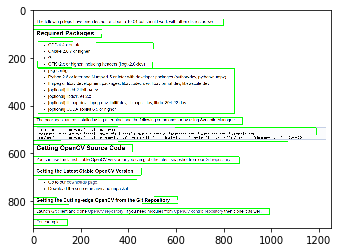

In [7]:
plt.imshow(dst)

In [22]:
def split_images(image,regions,dirname):
    import os
    #texts = []
    fnames = []
    idx = 1
    for region in regions:
        ex,ey,ew,eh = region
        text_region = image[ey:(ey+eh),ex:(ex+ew)]
        fname = 'text_%d.jpg' % (idx)
        save_path = os.path.abspath(os.path.join(dirname,fname))
        fnames.append(save_path)
        cv2.imwrite(save_path,text_region)
        idx += 1
        # 出现有一些图像无法识别，不知道原因，从文件读取，识别正常
        #text =  pytesseract.image_to_string(text_region,lang='chi_sim')
        #print(text,'\n')
        #texts.append(text)
    return fnames

def get_texts(fnames):
    texts = []
    for fname in fnames:
        text_region = cv2.imread(fname)
        if type(text_region) is type(None):
            print('invalid region')
            continue
        text =  pytesseract.image_to_string(text_region,lang='chi_sim')
        if len(text) != 0:
            texts.append(text)
    return texts

In [9]:
fnames = split_images(rgb,regions,'../temp/texts')
texts = get_texts(fnames)

In [10]:
# texts = get_texts(fnames)

In [11]:
for text in texts:
    print(text,'\n')

For example 

Launch Git client and clone OpenCyv repository. If you need modules from OpenCyV contrib repository then clone it as well. 

Getting the Cutting-edge OpenCyVv from the Git Repository 

。 Goto our downloads page.
。 Download the source archive and unpack it. 

Getting the Latest Stable OpenCVv Version 

You can use the latest stable OpenCyV version or you can grab the latest snapshot from our Git repository. 

Getting OpenCV Source Code 

[compiler] sudo apt-get install build-essential
[required] sudo apt-get install cmake git libgtk2.0-dey pkg-config libaycodec-dey libayformat-dey libswscale-dey
[optional] sudo apt-get install python-dey python-numpy libtbb2 libtbb-dey libjpeg-dey libpng-dey libtiff-dey libjasper-dey libdc1394-22-dey 

The packages can be installed using a terminal and the following commands or by using Synaptic Manager: 

pkg-config

Python 2.6 orlater and Numpy 1.5 or later with developer packages (python-dev, python-numpy)
ffmpeg orlibav development pac

The following steps have been tested for Ubuntu 10.04 but should work with other distros as well.


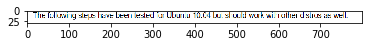

In [12]:
ex,ey,ew,eh = regions[-1]
plt.imshow(rgb[ey:ey+eh,ex:ex+ew])
text =  pytesseract.image_to_string(rgb[ey:ey+eh,ex:ex+ew],lang='chi_sim')
print(text)

In [13]:
res = pytesseract.image_to_string(rgb,lang='chi_sim')

In [14]:
print(res)

The following steps have been tested for Ubuntu 10.04 but should work with other distros as well.

Required Packages

GCC 4.4.xorlater

CMake 2.8.7 or higher

。，Git

GTK+2.x or higher including headers (libgtk2.0-dev)

pkg-config

Python 2.6 orlaterand Numpy 1.5 orlater with developer packages (python-dev, python-numpy)
ffmpeg or libav development packages: libavcodec-dev, libavformat-dev, libswscale-dev
[optional] iibtbb2 libtbb-dev

[optional] libdc1394 2.x

[optional] libjpeg-dev, libpng-dev, libtif-dev, libjasper-dev, libdc1394-22-dev

[optionall CUDA Toolkit 6.5 or higher

The packages can be installed using a terminal and the following commands or by using Synaptic Manager

[compiler] sudo apt-get install build-essential
[required] sudo apt-get install cmake git libgtk2.0-dey pkg-config libaycodec-dey libayformat-dey libswscale-dey
[optional] sudo apt-get install python-dey python-numpy libtbb2 libtbb-dey libjpeg-dey libpng-dey libtiff-dey libjasper-dey libdc1394-22-dev

Getting 

In [15]:
for fname in fnames:
    img = cv2.imread(fname)
    text = pytesseract.image_to_string(img,lang='chi_sim')
    print(text,'\n')

For example 

Launch Git client and clone OpenCyv repository. If you need modules from OpenCyV contrib repository then clone it as well. 

Getting the Cutting-edge OpenCyVv from the Git Repository 

。 Goto our downloads page.
。 Download the source archive and unpack it. 

Getting the Latest Stable OpenCVv Version 

You can use the latest stable OpenCyV version or you can grab the latest snapshot from our Git repository. 

Getting OpenCV Source Code 

[compiler] sudo apt-get install build-essential
[required] sudo apt-get install cmake git libgtk2.0-dey pkg-config libaycodec-dey libayformat-dey libswscale-dey
[optional] sudo apt-get install python-dey python-numpy libtbb2 libtbb-dey libjpeg-dey libpng-dey libtiff-dey libjasper-dey libdc1394-22-dey 

The packages can be installed using a terminal and the following commands or by using Synaptic Manager: 

pkg-config

Python 2.6 orlater and Numpy 1.5 or later with developer packages (python-dev, python-numpy)
ffmpeg orlibav development pac

In [18]:
rgb = cv2.imread('../datas/ID.jpg')
rgb = cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB)

In [23]:
fnames = split_images(rgb,regions,'../temp/texts')
print(fnames)
texts = get_texts(fnames)

['D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_1.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_2.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_3.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_4.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_5.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_6.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_7.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_8.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_9.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_10.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_11.jpg', 'D:\\Develop\\DL\\projects\\digital-image-processing\\temp\\texts\\text_12.jpg', 'D:\\Develop\\DL\\projects\\digital-

In [24]:
print(texts)

['AAA Eee EN ET关中     2', '本     妆也Jp人1 <三', '人\n\n别 男 民族回']


In [25]:
text = pytesseract.image_to_string(rgb,lang='chi_sim')

In [26]:
print(text)

马普业
男
人龟74 年 5 月26日

云南省昆明市寻旬回族到
族自治县羊街镇纳郎村委
会纳郎村72号

    
   
  

民 族 回

                                                                                                                                                                                                                                                                  
 
     

532231197405261333
